In [3]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
automobile = pd.read_table('automobile.txt', delimiter = ',')

In [5]:
automobile.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
# Find out number of records having '?' value for normalized losses
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()

41

#### Cleaning Dataset

In [7]:
# Setting the missing value to mean of normalized losses and convert the datatype to integer

nl = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)

#Setting the missing value to mean of peak-rpm and convert the datatype to integer

peak_rpm = automobile['peak-rpm'].loc[automobile['peak-rpm'] != '?']
prmean = peak_rpm.astype(str).astype(int).mean()
automobile['peak-rpm'] = automobile['peak-rpm'].replace('?',prmean).astype(int)

#Setting the missing value to mean of horsepower and convert the datatype to integer

horsepower = automobile['horsepower'].loc[automobile['horsepower'] != '?']
hmean = horsepower.astype(str).astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',hmean).astype(int)

In [8]:
#Setting the missing value to mean of bore and convert the datatype to float

bore = automobile['bore'].loc[automobile['bore'] != '?']
bmean = bore.astype(str).astype(float).mean()
automobile['bore'] = automobile['bore'].replace('?',bmean).astype(float)

#Setting the missing value to mean of stroke and convert the datatype to float

stroke = automobile['stroke'].loc[automobile['stroke'] != '?']
smean = stroke.astype(str).astype(float).mean()
automobile['stroke'] = automobile['stroke'].replace('?',smean).astype(float)

In [9]:
#Setting the missing value of num-of-doors to four because body-style == sedan

# Applying the condition
automobile['num-of-doors'].mask(automobile['num-of-doors'] == '?', 'four', inplace=True)

In [10]:
# Drop rows with missing price values. Since the price of the cars is what we are trying to predict in the analysis

# replace ? with Nan
automobile = automobile.replace('?', np.nan)

In [11]:
# Drop missing rows with missing price values
automobile.dropna(subset = ['price'], axis = 0, inplace=True)

In [12]:
# convert price dtype
automobile[['price']] = automobile[['price']].astype('float64')

In [13]:
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [14]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
automobile.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330692,3.256874,10.164279,103.402985,5117.661692,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,37.365650,478.113747,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [16]:
# Binning price to improve accuracy of the predictive models

# divide the range of the data into 3 equally sized bins
bin_width = int((max(automobile['price']) - min(automobile['price']))/3)

In [17]:
# build the bin array, from min value to max value, using bin_width calculated above
bins = range(int(min(automobile['price'])),int(max(automobile['price'])), bin_width)

In [18]:
# create a column “Price-binned” similar to the one with the group price of a car
automobile['price-binned'] = pd.cut(automobile['price'], bins, labels=['Low', 'Medium', 'High'])

#### Turning categorical variables into quantitative variables

In [19]:
# use the panda’s method ‘get_dummies’ to assign numerical values to different categories of fuel type

dummy_variable = pd.get_dummies(automobile['fuel-type'])

In [20]:
# change column names. Now have the value 0 to represent “gas” and 1 to represent “diesel”

dummy_variable.rename(columns={'fuel-type': 'gas', 'fuel-type': 'diesel'}, inplace=True)

In [21]:
# insert this column back into our original data-set

automobile = pd.concat([automobile,dummy_variable], axis=1)

In [22]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,Low,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,Low,0,1


#### EDA

###### Question at hand - What are the characteristics that have the most impact on the car price?

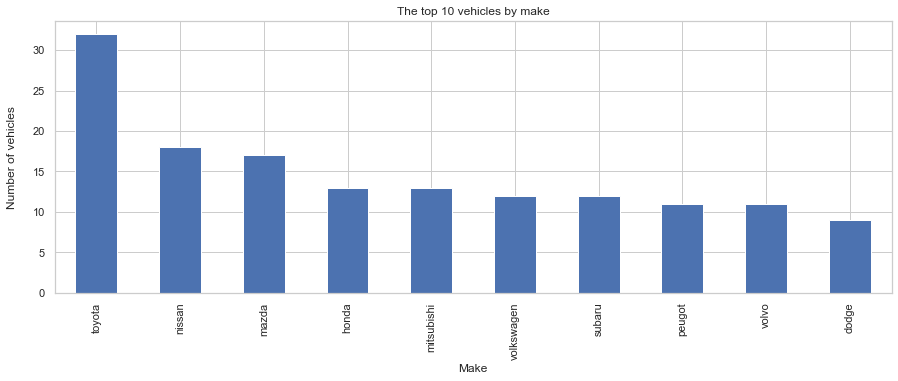

In [299]:
automobile.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("The top 10 vehicles by make")
plt.ylabel('Number of vehicles\n')
plt.xlabel('Make')

plt.show()

In [170]:
automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.661692,25.179104,30.686567,13207.129353,0.099502,0.900498
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113747,6.423220,6.815150,7947.066342,0.300083,0.300083
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.000000,24.000000,30.000000,10295.000000,0.000000,1.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000


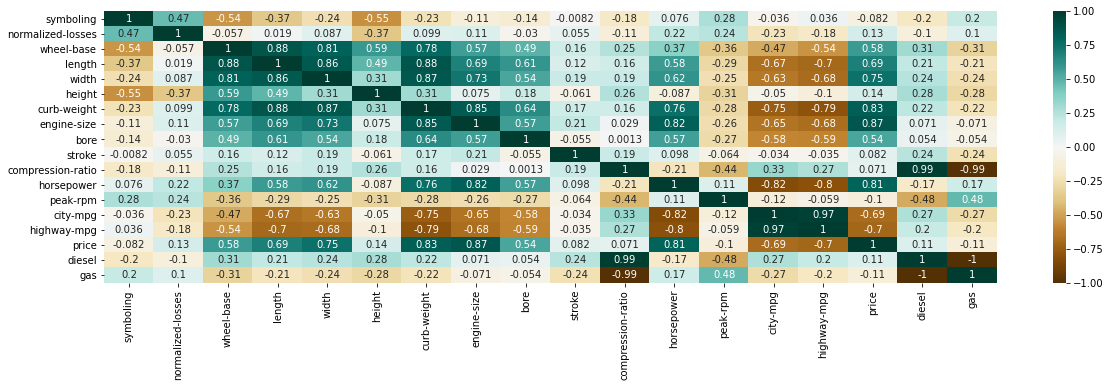

In [176]:
# Heat map to find the dependent variables. 
# One of the best ways to find the correlation between the features can be done using heat maps

# Plotting a heat map
plt.figure(figsize=(20,5))
c= automobile.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

plt.show()

##### For example: As shown above the Price has a strong correlation with Engine-size of 87% . This is very important because the more the relationship between the variables the more accurate the model will be.

In [172]:
drive_wheel_count = automobile['drive-wheels'].value_counts()
drive_wheel_count 

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

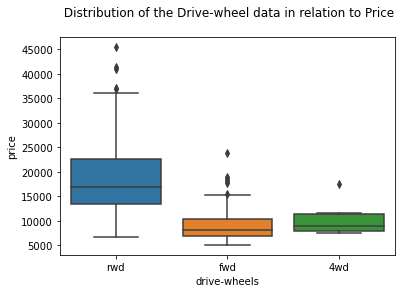

In [173]:
# Boxplot - to view the distribution of the drive-wheel data in relation to price

sns.boxplot(x = 'drive-wheels', y = 'price', data=automobile)
plt.title(' Distribution of the Drive-wheel data in relation to Price\n')

plt.show()

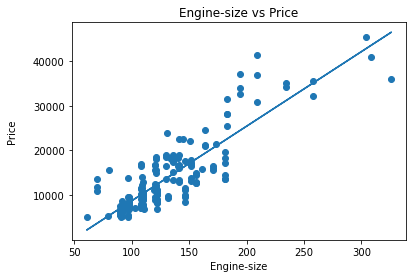

In [196]:
# Scatterplot - Could engine size predict the price of a car?

X = automobile['engine-size']
y = automobile['price']

plt.scatter(X, y)

# labels
plt.title('Engine-size vs Price')
plt.xlabel('Engine-size')
plt.ylabel('Price\n')

# line of best fit
m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X + b)


plt.show()

##### The conclusion which can be drawn is that we see that as the Engine-size goes up, the Price of the car also goes up.

##### Positive correlation between “engine-size” and “price”.

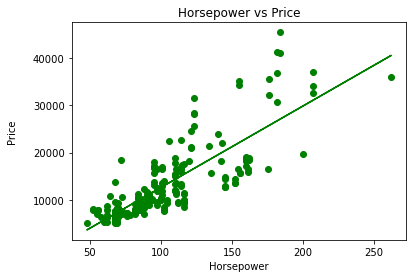

In [195]:
# Scatterplot - Could horsepower predict the price of a car?

X = automobile['horsepower']
y = automobile['price']

plt.scatter(X, y, color='g')

# labels
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price\n')

# line of best fit
m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X + b, color='g')


plt.show()

##### The conclusion which can be drawn is that we see that as the Horsepower goes up, the Price of the car also goes up.

In [23]:
# On average, which type of drive wheel is most valuable

df_group = automobile[['drive-wheels', 'body-style', 'price']]

In [29]:
drive_wheel_avg = df_group.groupby(['drive-wheels'], as_index=False).mean().sort_values(by='price',ascending=False)

drive_wheel_avg

,drive-wheels,price
2,rwd,19757.613333
0,4wd,10241.000000
1,fwd,9244.779661


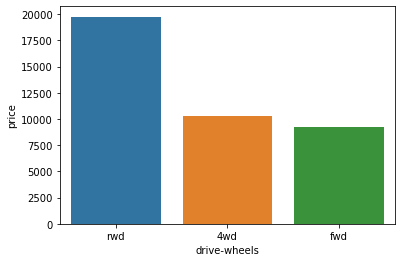

In [30]:
# bar plot reflecting above table information

sns.barplot(x = 'drive-wheels',
            y = 'price',
            data = drive_wheel_avg)
 
# Show the plot
plt.show()

##### From the data above, it seems rear-wheel drive vehicles are, on average, the most expensive.

##### Average price for Body-style and Drive-wheel

In [31]:
grouped_avg = df_group.groupby(['drive-wheels','body-style'], as_index=False).mean().sort_values(by='price',ascending=False)
grouped_avg

,drive-wheels,body-style,price
9,rwd,hardtop,24202.714286
8,rwd,convertible,23949.600000
11,rwd,sedan,21711.833333
12,rwd,wagon,16994.222222
10,rwd,hatchback,14337.777778
1,4wd,sedan,12647.333333
3,fwd,convertible,11595.000000
7,fwd,wagon,9997.333333
6,fwd,sedan,9811.800000
2,4wd,wagon,9095.750000


In [32]:
# convert to pivot table
pivot_table = grouped_avg.pivot(index='drive-wheels', columns='body-style')

# fill missing cells with value 0
pivot_table = pivot_table.fillna(0)

pivot_table

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

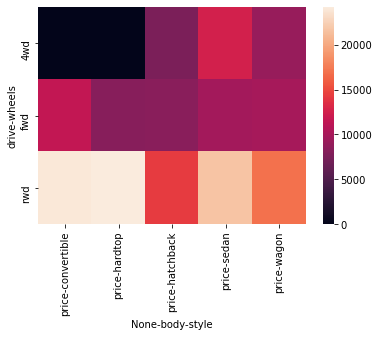

In [33]:
# convert pivot table to heatmap

sns.heatmap(pivot_table)

plt.show()

##### Analysis of Variance (ANOVA)

In [205]:
#  extract the make and price data
group = automobile[['make', 'price']]

In [206]:
#  group the data by different makes
group_anova = group.groupby(['make'], as_index=False)

In [207]:
# import Scipy package to perform ANOVA test
from scipy import stats

In [210]:
anova_result = stats.f_oneway(group_anova.get_group('honda')['price'],group_anova.get_group('jaguar')['price'])
anova_result

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

In [211]:
anova_result = stats.f_oneway(group_anova.get_group('audi')['price'],group_anova.get_group('porsche')['price'])
anova_result

F_onewayResult(statistic=18.779888592038436, pvalue=0.0024999089836031346)

In [35]:
# On average, which type of fuel-type is most valuable

fuel_group = automobile[['fuel-type','price']]

In [36]:
fuel_avg = fuel_group.groupby(['fuel-type'], as_index=False).mean()

fuel_avg

,fuel-type,price
0,diesel,15838.15000
1,gas,12916.40884


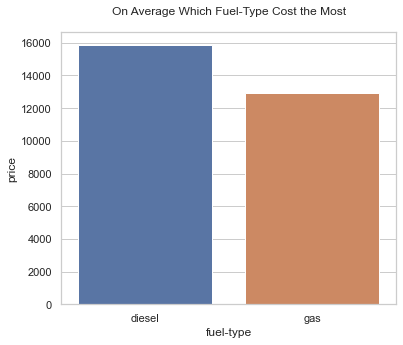

In [38]:
# change fig size
fig = plt.figure(figsize=(6, 5))

# plot graph - showing which fuel-type is most valuable
sns.set_theme(style="whitegrid")
sns.barplot(x ='fuel-type', y ='price', data = fuel_avg)
plt.title('On Average Which Fuel-Type Cost the Most\n ')
# Show the plot
plt.show()

In [41]:
# create new dataframe
make_group = automobile[['make', 'price']]

In [50]:
# find avergae price of various makes
make_avg = make_group.groupby(['make'], as_index=False).mean().sort_values(by='price',ascending=False)

# convert prices to int
make_avg['price'] = make_avg['price'].astype(float).astype(int)


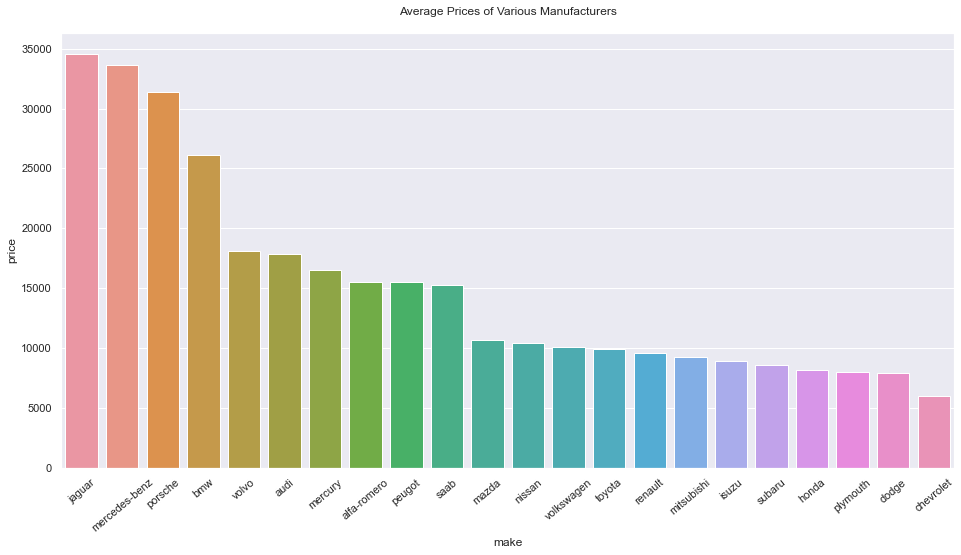

In [49]:
# change fig size
fig = plt.figure(figsize=(16, 8))

# label graph
sns.set_theme(style="darkgrid")
plt.xticks(rotation = 40)
plt.title('Average Prices of Various Manufacturers\n ')

# plot graph
ax = sns.barplot(x="make", y="price", data=make_avg)

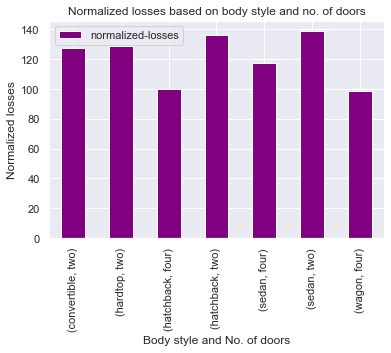

In [51]:
# change fig size

pd.pivot_table(automobile,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

plt.show()

##### Findings: As we understand the normalized loss which is the average loss payment per insured vehicle is calculated with many features of the cars which includes body style and no. of doors. Normalized losses are distributed across different body style but the two door cars has more number of losses than the four door cars.

